![example](images/director_shot.jpeg)

# Project Title

**Authors:** Irking Chua
***

## Overview

This project analyzes data for the needs of Microsoft to creating a blockbuster movie. Desccriptive analysis of the movies of the last century can let us know some common denominator of what is formula for a blockbuster. Microsoft can use this analysis to check the trend and what makes a blockbuster movie.

## Business Problem

Microsoft is a greenhorn in the movie business so this may enable them to get in with the trend so they can allocate sufficient funds and effort to ensure that it will allow Microsoft to start producing blockbuster hits. Doing so can help them find their voice.

## Data Understanding

We need to understand which movies does well in the market so we need dataset from movie-related sites for this particular analysis we would be using data from imdb.com, boxofficemojo.com and the-numbers.com. Since some movies has the same title but comes out in a different year and also the data that we gather from sites have the same column these problems need to be addressed. The data files provides the title, year, genre and its statistics (e.g. production budget, runtime minutes)

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Here you run your code to explore the data
bom_movie_gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
title_rating_df = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')
title_basic_df = pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
movie_budget_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [4]:
# Here you run your code to clean the data
rating_basic_df = pd.merge(title_basic_df, title_rating_df,on = ['tconst'] ,how = 'inner')

In [5]:
#I want to check how many data are missing on the rating_basic_df
rating_basic_df.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [6]:
# assigning a new dataframe variable to reflect what I would be doing
rating_basic_filled_df = rating_basic_df

In [7]:
# I need to change the data type to a float so I can perform numerical operation on it
rating_basic_filled_df['runtime_minutes'] = pd.to_numeric(rating_basic_filled_df['runtime_minutes']) 

In [8]:
# Now that it is in a type that I can manipulate I would fill the missing data with the median of the runtime_minutes which
# the average runtime that it usually runs by
rating_basic_filled_df['runtime_minutes'] = rating_basic_df['runtime_minutes'].fillna(rating_basic_df['runtime_minutes'].median())

In [9]:
#Renaming the rating_basic_filled_df column 'primary_title' to 'title' so I can merge it with the bom_movie_gross_df
rating_basic_filled_df.rename(columns = {'primary_title':'title'}, inplace= True)

**Data Merging**

In [10]:
# We can start with merging the bom_movie_gross_df and movie_budget_df but we need to first rename
movie_budget_df.rename(columns = {'movie':'title'}, inplace = True)
movie_gross_budget_df = pd.merge(bom_movie_gross_df, movie_budget_df, on = ['title'] ,how = 'inner')
merged_df = pd.merge(movie_gross_budget_df, rating_basic_filled_df, on = ['title'], how = 'inner')

In [11]:
# I want to drop all the duplicates that has the same title and release date and keep at least one of them 
merged_df = merged_df.drop_duplicates(subset = ['title', 'release_date'], keep = 'first')

In [12]:
#this appeared on the error as something that needs to be resolved before we can turn the foreign_gross into an int
merged_df[merged_df['foreign_gross'] == '1,019.4']
merged_df[merged_df['foreign_gross'] == '1,163.0']
merged_df[merged_df['foreign_gross'] == '1,010.0']
merged_df[merged_df['foreign_gross'] == '1,369.5']
# Now we just need to resolve the error
merged_df['foreign_gross'][824] = '1017600000'
merged_df['foreign_gross'][825] = '1163000000'
merged_df['foreign_gross'][1170] = '1010000000'
merged_df['foreign_gross'][1302] = '1369500000'
#now we can change the dtype of the column foreign_gross to int
merged_df['foreign_gross'] = pd.to_numeric(merged_df['foreign_gross'])

C:\Users\chuai\AppData\Local\Temp\ipykernel_14572\3761404762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['foreign_gross'][825] = '1163000000'
C:\Users\chuai\AppData\Local\Temp\ipykernel_14572\3761404762.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['foreign_gross'][1170] = '1010000000'
C:\Users\chuai\AppData\Local\Temp\ipykernel_14572\3761404762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merg

In [13]:
# some foreign gross data is missing so I filled it in with the median of the movies from the last century
merged_df['foreign_gross'] = merged_df['foreign_gross'].fillna(value = merged_df['foreign_gross'].median())

**Data Cleaning**

In [14]:
#I would like to remove the comma on the genre
def split_comma(x):
    return x.split(",")

In [15]:
# We need to find out if the genres column is missing any data
merged_df['genres'].isna().sum()

1

In [16]:
#there is 1 but we can either drop it or fill it for this I will
# fill it with 'missing' as in the big picture wouldn't affect out data much
merged_df['genres'] = merged_df['genres'].fillna(value = 'missing')


In [17]:
# Using the map method to remove the comma
merged_df['genres'] = merged_df['genres'].map(split_comma)

In [18]:
# defining another function so we can remove the dollar sign and commas on the production_budget
def remove_dollar_comma(x):
    x = x.replace(",","")
    return x.replace("$","")

In [19]:
# By using the function that we just made we can proceed with changing the data type to int
merged_df['production_budget'] = merged_df['production_budget'].map(remove_dollar_comma)

In [20]:
# now we can change the type of the column production_budget to integer 
merged_df['production_budget'] = pd.to_numeric(merged_df['production_budget'])

Featured engineering

In [21]:
# I want to delete the old worldwide_gross column as I want to create a new and accurate one just incase there are
# values that are missing this makes the data more consistent
merged_df.drop("worldwide_gross", axis = 1)

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,47,"Jun 18, 2010",200000000,"$415,004,880",tt0435761,Toy Story 3,2010,103.0,"[Adventure, Animation, Comedy]",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,38,"Jul 16, 2010",160000000,"$292,576,195",tt1375666,Inception,2010,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,27,"May 21, 2010",165000000,"$238,736,787",tt0892791,Shrek Forever After,2010,93.0,"[Adventure, Animation, Comedy]",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,53,"Jun 30, 2010",68000000,"$300,531,751",tt1325004,The Twilight Saga: Eclipse,2010,124.0,"[Adventure, Drama, Fantasy]",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,15,"May 7, 2010",170000000,"$312,433,331",tt1228705,Iron Man 2,2010,124.0,"[Action, Adventure, Sci-Fi]",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,Destroyer,Annapurna,1500000.0,4000000.0,2018,5,"Dec 25, 2018",9000000,"$1,533,324",tt7137380,Destroyer,2018,121.0,"[Action, Crime, Drama]",6.2,13683
1408,Gotti,VE,4300000.0,43000000.0,2018,64,"Jun 15, 2018",10000000,"$4,286,367",tt1801552,Gotti,2018,112.0,"[Biography, Crime, Drama]",4.8,10358
1409,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,100,"Feb 2, 2018",30000000,"$490,973",tt3576728,Bilal: A New Breed of Hero,2015,105.0,"[Action, Adventure, Animation]",8.0,16854
1410,Mandy,RLJ,1200000.0,43000000.0,2018,71,"Sep 14, 2018",6000000,"$1,214,525",tt4995858,Mandy,2016,113.0,"[Drama, Thriller]",4.1,39


In [22]:
# Now I want to calculate worldwide gross and put it in a new column named 'worldwide_gross'
# which is the sum of the 'domestic_gross' and 'foreign_gross'
merged_df['worldwide_gross'] = merged_df['domestic_gross_x'] + merged_df['foreign_gross']

In [23]:
# I want to make a new column that is names 'blockbuster' that returns True or false
# following stevenfollows.com definition and a simple rule of thumb
# that if the production budget, considering has everything from production cost to marketing cost
# it would be considered as a hit
merged_df['blockbuster'] = (merged_df['worldwide_gross']) >= (2 * merged_df['production_budget'])

In [24]:
# Now I want to filter all the blockbuster and then sort them via their world
blockbusters_df = merged_df[merged_df['blockbuster'] == True] 
blockbusters_sort_df = blockbusters_df.sort_values(['worldwide_gross'], ascending = False)

In [25]:
# I want to see the top 10 studios who made the most of box office hits
top_studios = blockbusters_sort_df['studio'].value_counts().head(10)

In [26]:
# I want to find out which combination of genres are the most common out of
# all the blockbuster movies
top_genres = blockbusters_sort_df['genres'].value_counts().head(10)

In [27]:
# I wanted to check the movies that earned the most
top_10_num = blockbusters_sort_df.head(10).drop(['year','release_date', 'blockbuster', 'averagerating','genres', 'domestic_gross_y','tconst','original_title','start_year','id', 'year'], axis=1)

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [28]:
# Here you run your code to model the data
colors = ['red','blue','yellow','green','pink','purple','black', 'violet', 'orange', 'crimson']

In [29]:
top_10_num

,title,studio,domestic_gross_x,foreign_gross,production_budget,worldwide_gross,runtime_minutes,numvotes
1302,Avengers: Infinity War,BV,678800000.0,1.369500e+09,300000000,2.048300e+09,149.0,670926
824,Jurassic World,Uni.,652300000.0,1.017600e+09,215000000,1.669900e+09,124.0,539338
825,Furious 7,Uni.,353000000.0,1.163000e+09,190000000,1.516000e+09,137.0,335074
826,Avengers: Age of Ultron,BV,459000000.0,9.464000e+08,330600000,1.405400e+09,141.0,665594
1303,Black Panther,BV,700100000.0,6.469000e+08,200000000,1.347000e+09,134.0,516148
1304,Jurassic World: Fallen Kingdom,Uni.,417700000.0,8.918000e+08,170000000,1.309500e+09,128.0,219125
520,Frozen,BV,400700000.0,8.757000e+08,150000000,1.276400e+09,93.0,62311
1305,Incredibles 2,BV,608600000.0,6.342000e+08,200000000,1.242800e+09,118.0,203510
1170,The Fate of the Furious,Uni.,226000000.0,1.010000e+09,250000000,1.236000e+09,136.0,179774
523,Iron Man 3,BV,409000000.0,8.058000e+08,200000000,1.214800e+09,130.0,692794


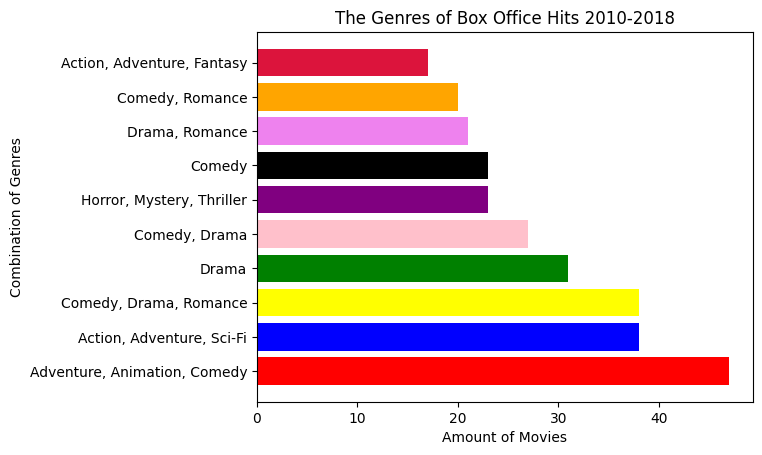

In [40]:
# I took the top 10 of the genres so we can have a baseline of which genres are the most produced
# and maybe can make a blockbuster hit
fig, ax = plt.subplots()
genre_name = ['Adventure, Animation, Comedy', 'Action, Adventure, Sci-Fi', 'Comedy, Drama, Romance', 'Drama', 'Comedy, Drama', 'Horror, Mystery, Thriller', 'Comedy', 'Drama, Romance', 'Comedy, Romance', 'Action, Adventure, Fantasy']
ax.barh(genre_name,list(top_genres), color = colors)
ax.set_xlabel('Amount of Movies')
ax.set_ylabel('Combination of Genres')
ax.set_title('The Genres of Box Office Hits 2010-2018')
plt.savefig(".\image\genres_bar.png", dpi = 150, bbox_inches = 'tight')

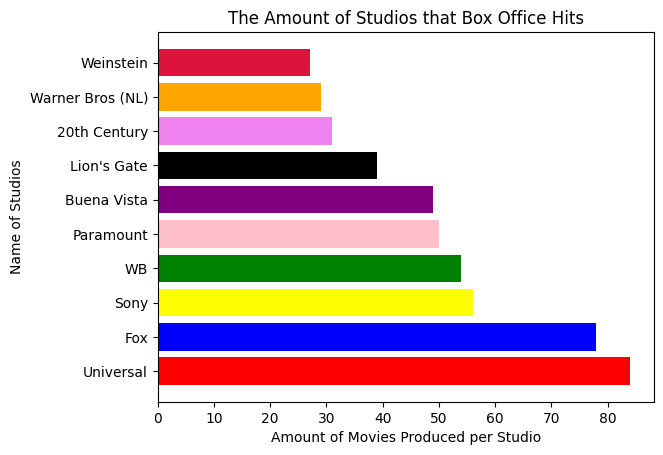

In [41]:
# I took the top 10 of the studio so we know if maybe if we have existing relationships with them we have a collaboration 
# in making a new original content
fig, ax = plt.subplots()
studio_name = ['Universal','Fox','Sony','WB','Paramount','Buena Vista',"Lion's Gate",'20th Century','Warner Bros (NL)','Weinstein']
ax.barh(studio_name,list(top_studios), color = ['red','blue','yellow','green','pink','purple','black', 'violet', 'orange', 'crimson'])
ax.set_xlabel('Amount of Movies Produced per Studio')
ax.set_ylabel('Name of Studios')
ax.set_title('The Amount of Studios that Box Office Hits')
plt.savefig(".\image\studio_bar.png", dpi = 150, bbox_inches = 'tight')

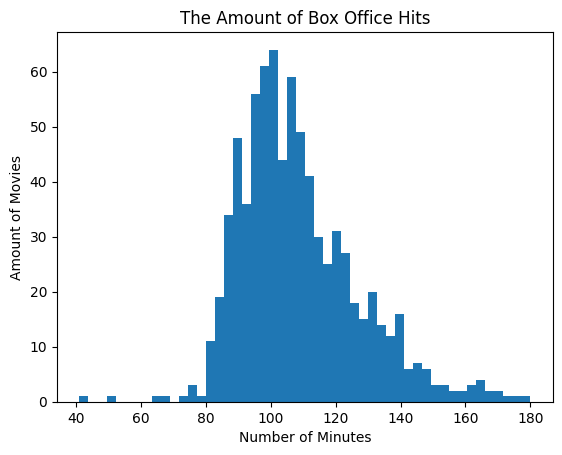

In [42]:
# Here is the number of movies that the runtime that they usually run for that might sway people to watch the movie.
fig, ax = plt.subplots()
ax.hist(list(blockbusters_df['runtime_minutes']),bins = 50)
ax.set_xlabel('Number of Minutes')
ax.set_ylabel('Amount of Movies')
ax.set_title('The Amount of Box Office Hits')
plt.savefig("numberminutes.png", dpi = 150, bbox_inches = 'tight')

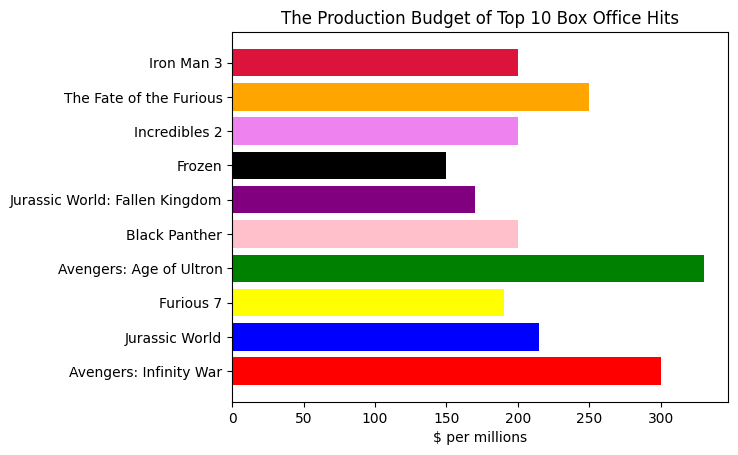

In [43]:
# Here is the the chart can see the production budget of the top 10 box office hits
fig, ax = plt.subplots()
ax.barh(top_10_num['title'] ,list(top_10_num['production_budget']/1000000), color = colors)
ax.set_xlabel('$ per millions')
ax.set_title('The Production Budget of Top 10 Box Office Hits')
plt.savefig(".\image\production_budget_bar.png", dpi = 150, bbox_inches = 'tight')

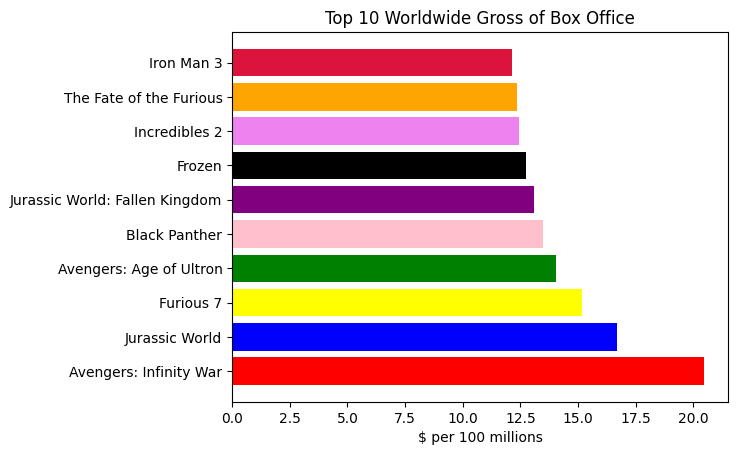

In [44]:
# Here is a chart that we can see which title made the most money
fig, ax = plt.subplots()
ax.barh(top_10_num['title'] ,list(top_10_num['worldwide_gross']/100000000), color = colors)
ax.set_xlabel('$ per 100 millions')
ax.set_title('Top 10 Worldwide Gross of Box Office')
plt.savefig(".\image\worldwide_gross_bar.png", dpi = 150, bbox_inches = 'tight')

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Evaluation

***
With the data that was presented we have something that we can work with. We have data from what are the good genres, a good runtime and an approximate production budget and hopefully get somewhere near the top 10 worldwide gross. I believe that this can serve as a guide that they can use to make their first blockbuster hit.

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

## Conclusions
***
This analysis leads to three recommendations for future Microsoft's movie studio's debut blockbuster film:
* Making a superhero film that follows the combination of adventure, animation, comedy(e.g. Frozen) or action, adventure, sci-fi(e.g. Iron Man 3) as this is most popular genres that is in the box office. Five out of the top ten worldwide gross earnings are all superhero movies.

* Doing a partnership with Universal Pictures or with Fox, more commonly known as 20th Century, since they have seniority in the film production and they produce the most blockbusters.

* Making a movie at the range of 90-110 minutes and the budget of 150 million to 300 million a good maximum benchmark to allot.

## Next Steps
***
Further analyses could yield additional insights to further get a better prediction
* More data so we can check good directors, actors and other staff that can increase the chances of making a blockbuster movie.
* Predicting possible hold for production that can increase the budget.
* Staying a top of the trends meaning jump in a new trend before the novelty wear off since movies takes time to produce it would need to still be relevant even after a few months or years to get maximum profits.